In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt # for plots
import seaborn as sns
%matplotlib inline

In [2]:
#fetching data from S&P 500 index using yfinance api
sp500_df = yf.download('^GSPC', start = datetime.datetime(1994, 7, 9), end = datetime.datetime(2024, 7, 9))

[*********************100%%**********************]  1 of 1 completed


In [3]:
#performing some preliminary data checks
sp500_df.dtypes #checking the data types of each feature
sp500_df.isna().sum(); #calculate 'NaN' counts for each column

Text(0, 0.5, 'Closing Price in USD')

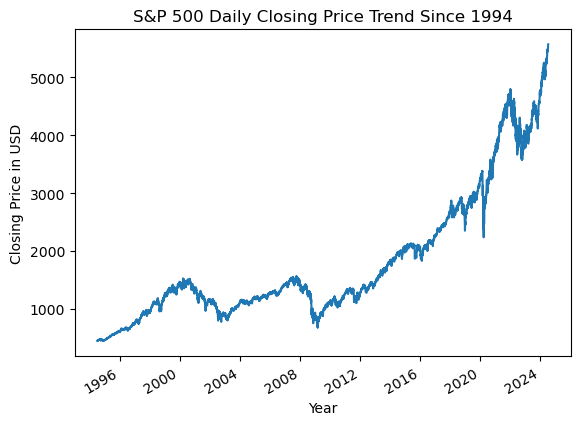

In [4]:
#plotting s&p index closing price over years
ax = sp500_df['Adj Close'].plot()
ax.set(xlabel='Date',ylabel='S&P 500')
ax.set_title('S&P 500 Daily Closing Price Trend Since 1994')
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price in USD')

Text(0, 0.5, 'Closing Price in USD')

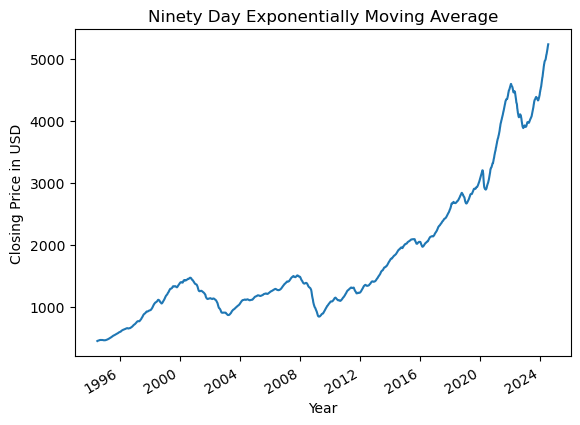

In [5]:
#plotting exponentially weighted moving avergae data on the same data for a smoother curve
sp500_df['ewma'] = sp500_df['Adj Close'].ewm(span=90).mean()
ax = sp500_df['ewma'].plot()
ax.set_title('Ninety Day Exponentially Moving Average')
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price in USD')

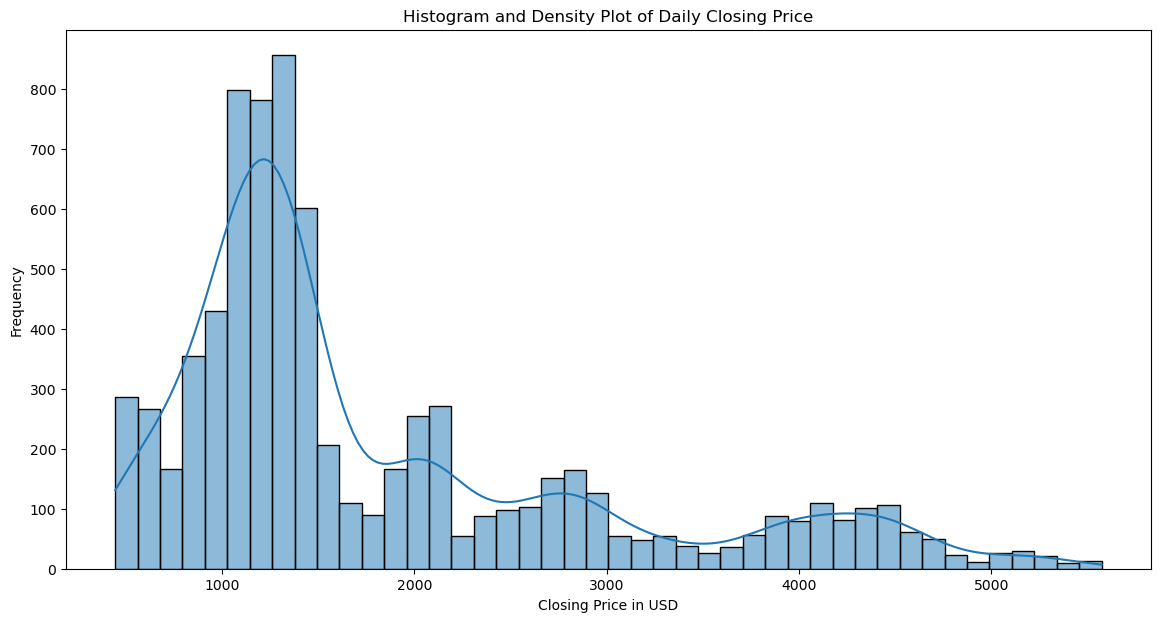

In [6]:
#histogram and density plot of the daily closing price 
plt.figure(figsize=(14, 7))
sns.histplot(sp500_df['Adj Close'], kde=True)
plt.title('Histogram and Density Plot of Daily Closing Price')
plt.xlabel('Closing Price in USD')
plt.ylabel('Frequency')
plt.show()

In [46]:
#extracting the stock information of the top 5% of s and p 500 index.
sp500_top_25_tickers = [ "AAPL", "MSFT", "GOOGL", "GOOG", "AMZN", "META", "TSLA", "BRK.B", "NVDA", "JNJ", "V", "JPM",
    "PG", "UNH", "HD", "PYPL", "MA", "NSRGY", "TSM", "ADBE", "WMT", "RHHBY", "PFE", "CMCSA", "NFLX"]
top25_df = pd.DataFrame()
for stock in sp500_top_25_tickers:
    df25 = yf.download(stock, start = datetime.datetime(1994, 7, 9), end = datetime.datetime(2024, 7, 9))
    top25_df[stock] = df25['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[***

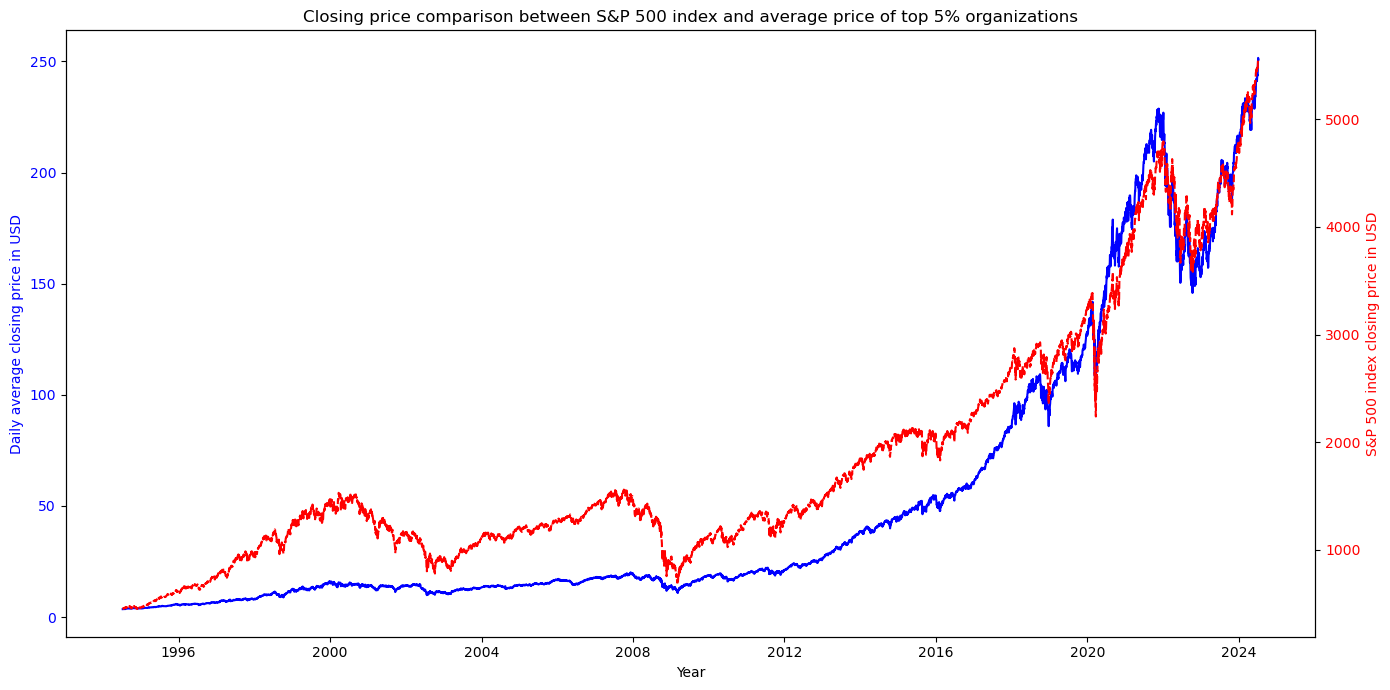

In [25]:
#calculating the average of the indexes
top25_df['average'] = top25_df.mean(axis = 1)
top25_df['average'];
#plotting a comparison graph between the s&p500 index and top 5% organizations
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(top25_df.index, top25_df['average'], label='Average of All Companies', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Daily average closing price in USD', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(sp500_df.index, sp500_df['Adj Close'], label='S&P 500 Index', color='r', linestyle='--')
ax2.set_ylabel('S&P 500 index closing price in USD', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Closing price comparison between S&P 500 index and average price of top 5% organizations')
fig.tight_layout()
plt.show()

In [48]:
#extracting the stock information of the bottom 5% of s and p 500 index.
sp500_last_25_tickers = ["CMI","AEP","PSA","ICE","SO","HCA","PLD","FISV","EL","PRU","CCI","MET","PNC","COST",
                         "LHX","BDX","AON","SBUX","GS","DHR","MMM","T","BKNG","CVX","NKE"]
last25_df = pd.DataFrame()
for stock in sp500_last_25_tickers:
    df25 = yf.download(stock, start = datetime.datetime(1994, 7, 9), end = datetime.datetime(2024, 7, 9))
    last25_df[stock] = df25['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

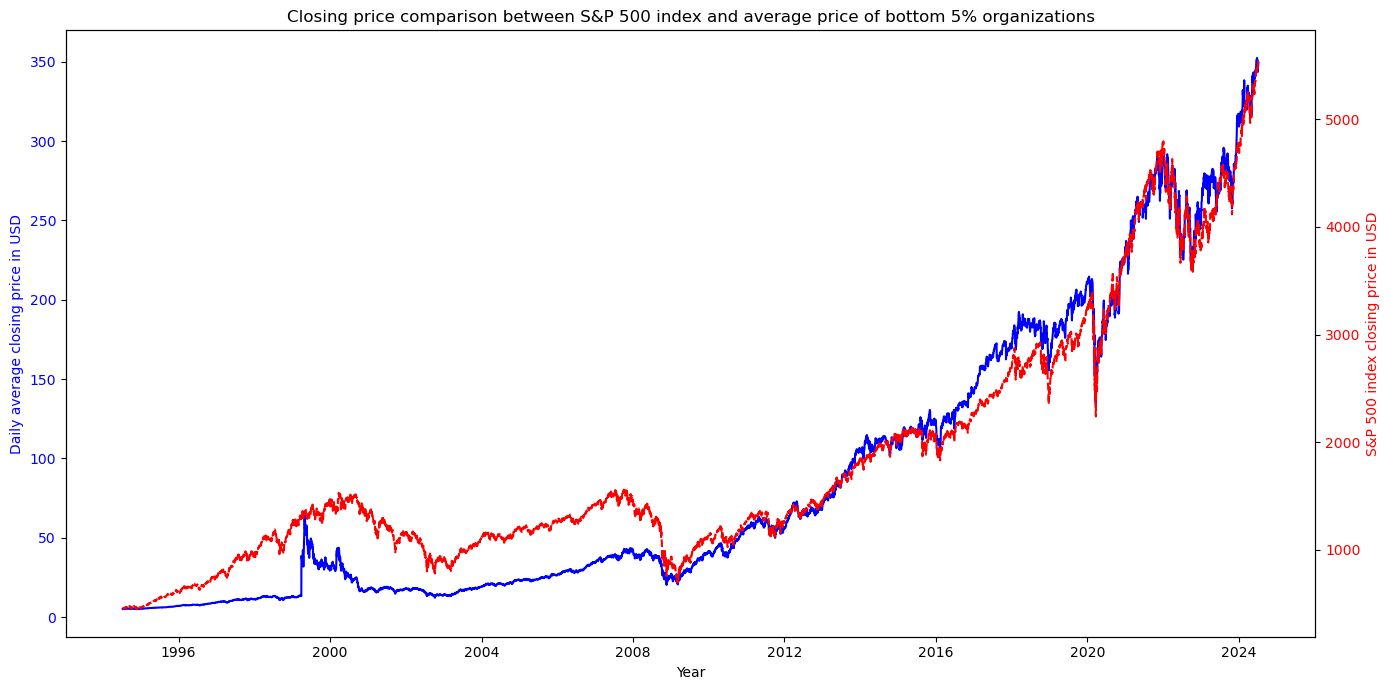

In [49]:
#calculating the average stock closing prices 
last25_df['average'] = last25_df.mean(axis = 1)
last25_df['average'];

#plotting the dual axes
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(last25_df.index, last25_df['average'], label='Average of All Companies', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Daily average closing price in USD', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(sp500_df.index, sp500_df['Adj Close'], label='S&P 500 Index', color='r', linestyle='--')
ax2.set_ylabel('S&P 500 index closing price in USD', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Closing price comparison between S&P 500 index and average price of bottom 5% organizations')
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Different rolling averages window comparison')

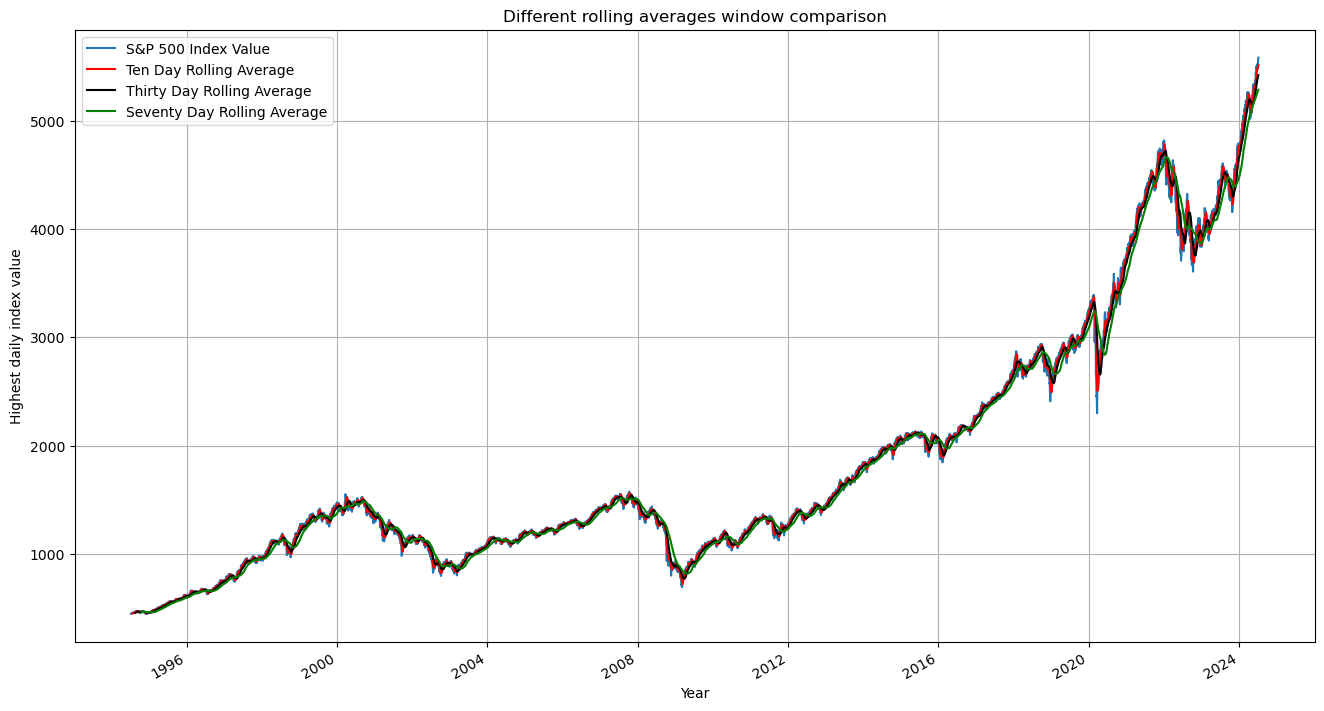

In [7]:
#creating rolling averages with different windows
sandp = sp500_df.High
roll_avg_10 = sp500_df.High.rolling(window=10).mean()
roll_avg_30 = sp500_df.High.rolling(window=30).mean()
roll_avg_70 = sp500_df.High.rolling(window=70).mean()
roll_std_30 = sp500_df.High.rolling(window=30).std()

fig, ax = plt.subplots(figsize=(16, 9))
fig.autofmt_xdate()
ax.plot(sandp, label='S&P 500 Index Value', color='tab:blue')
ax.plot(roll_avg_10, label='Ten Day Rolling Average', color='r')
ax.plot(roll_avg_30, label='Thirty Day Rolling Average', color='k')
ax.plot(roll_avg_70, label='Seventy Day Rolling Average', color='g')
#ax.plot(roll_std_30, label='Rolling Avg 70', color='b')
ax.legend()
ax.grid()
ax.set(xlabel='Year',ylabel='Highest daily index value')
plt.title('Different rolling averages window comparison')